In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\aa946\OneDrive\Desktop\DataScience\pandastutorial-main\pandastutorial-main\Datasets\hr_data.csv')
df.head(5)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
df['employee_id'].count()

14999

In [4]:
df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

# Employee Performance:

1.Average monthly hours worked by employees across different departments?

    department  average_montly_hours
0           IT            202.215974
1        RandD            200.800508
2   accounting            201.162973
3           hr            198.684709
4   management            201.249206
5    marketing            199.385781
6  product_mng            199.965632
7        sales            200.911353
8      support            200.758188
9    technical            202.497426


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1465422092.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department',y='average_montly_hours',data=Avg_Mon_Emp_hours,palette=colors)
C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1465422092.py:5: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='department',y='average_montly_hours',data=Avg_Mon_Emp_hours,palette=colors)


Text(0.5, 1.0, 'Avg Monthly performance by Employ in different departments')

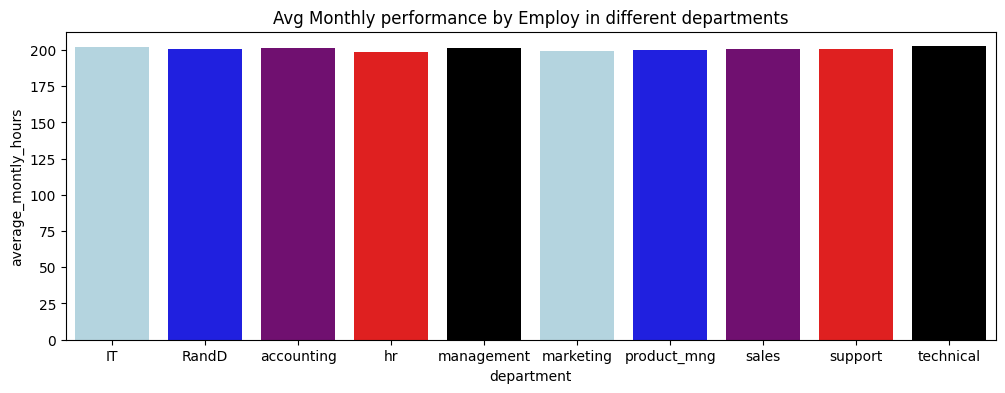

In [6]:
Avg_Mon_Emp_hours=df.groupby('department')['average_montly_hours'].mean().reset_index()
print(Avg_Mon_Emp_hours)
colors = ['lightblue', 'blue', 'purple', 'red', 'black']
plt.figure(figsize=(12,4))
sns.barplot(x='department',y='average_montly_hours',data=Avg_Mon_Emp_hours,palette=colors)
plt.title('Avg Monthly performance by Employ in different departments')

This graph show in each department there are equal level of monthly working hours with very small ups and downs.

2. Number of projects correlate with employee performance?

                       employee_id  number_project  average_montly_hours  \
employee_id               1.000000       -0.009225             -0.007175   
number_project           -0.009225        1.000000              0.417211   
average_montly_hours     -0.007175        0.417211              1.000000   
time_spend_company        0.104660        0.196786              0.127755   
Work_accident             0.010482       -0.004741             -0.010143   
left                     -0.099736        0.023787              0.071287   
promotion_last_5years     0.079406       -0.006064             -0.003544   

                       time_spend_company  Work_accident      left  \
employee_id                      0.104660       0.010482 -0.099736   
number_project                   0.196786      -0.004741  0.023787   
average_montly_hours             0.127755      -0.010143  0.071287   
time_spend_company               1.000000       0.002120  0.144822   
Work_accident                    0.002120

<Axes: >

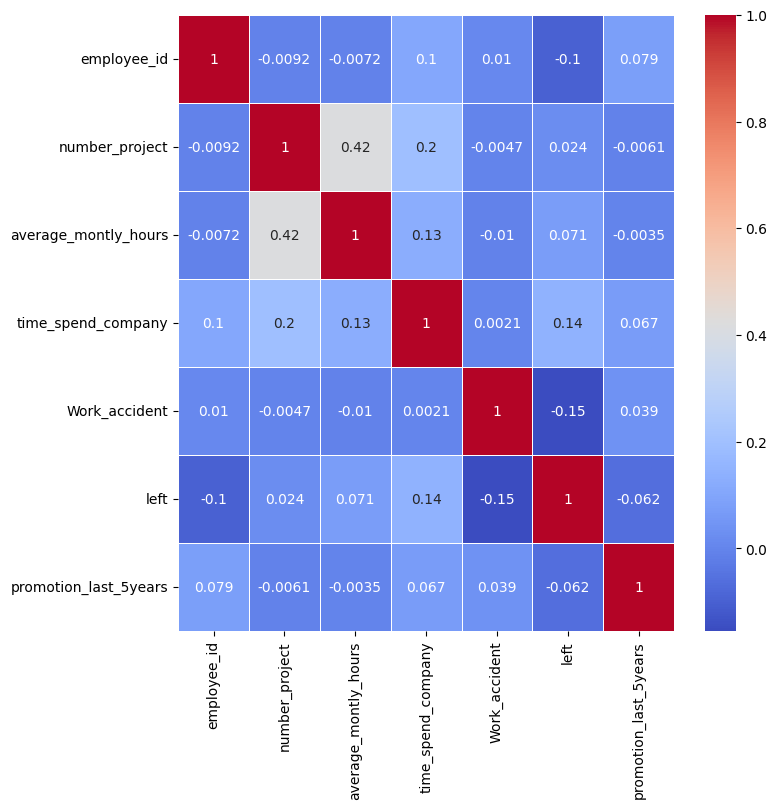

In [7]:
numeric_column=df.select_dtypes(include='number')
corelation_matrix=numeric_column.corr()
print(corelation_matrix)
plt.figure(figsize=(8,8))
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm', linewidths=0.5)

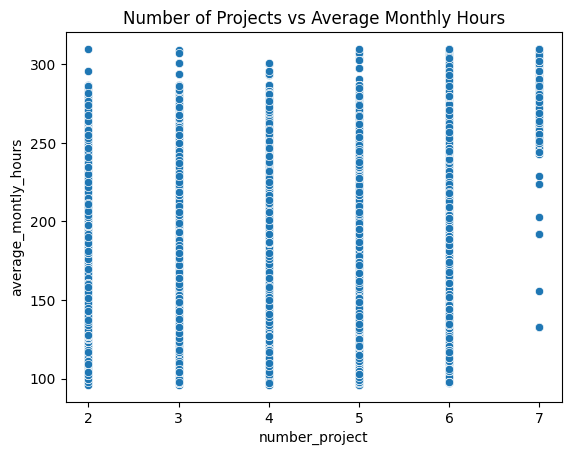

In [8]:
sns.scatterplot(x='number_project', y='average_montly_hours', data=df)
plt.title('Number of Projects vs Average Monthly Hours')
plt.show()

This show those employs who has 7 project their average mmonthly hours are mostly more than 200.

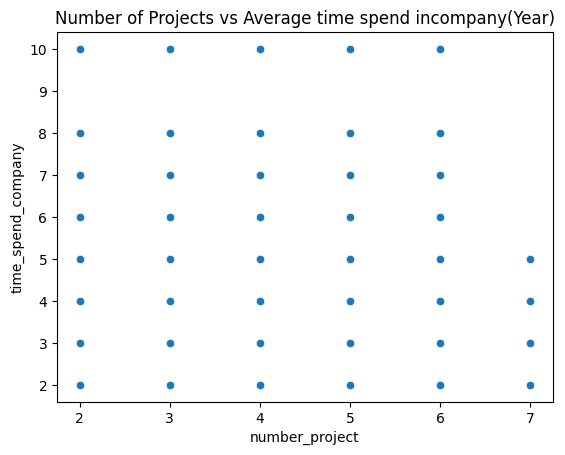

In [9]:
sns.scatterplot(x='number_project', y='time_spend_company', data=df)
plt.title('Number of Projects vs Average time spend incompany(Year)')
plt.show()

Those employs who has more than 7 projects doesnt spend time more than 5 years.

   number_project  left
0               2  1567
1               3    72
2               4   409
3               5   612
4               6   655
5               7   256


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\3660072420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_project', y='left', data=people_left,palette=colors)


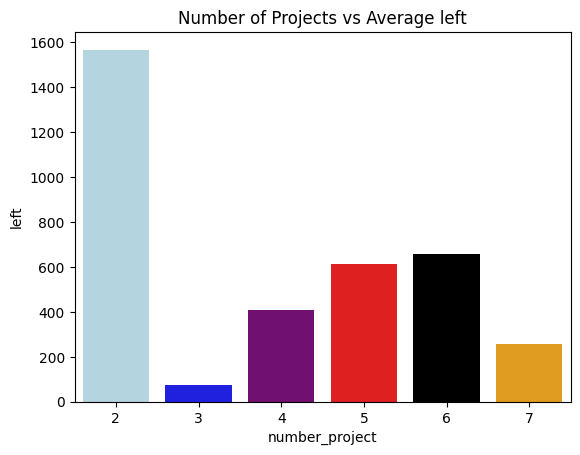

In [29]:
people_left=df.groupby('number_project')['left'].sum().reset_index()
colors = ['lightblue', 'blue', 'purple', 'red', 'black','orange']
print(people_left)
sns.barplot(x='number_project', y='left', data=people_left,palette=colors)
plt.title('Number of Projects vs Average left')
plt.show()

number_project
2    2388
3    4055
4    4365
5    2761
6    1174
7     256
dtype: int64
number_project
2    1567
3      72
4     409
5     612
6     655
7     256
Name: left, dtype: int64
number_project
2     65.619765
3      1.775586
4      9.369989
5     22.165882
6     55.792164
7    100.000000
dtype: float64


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\371728902.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_project',y='left_Rate',data=df3,palette='viridis')


<Axes: xlabel='number_project', ylabel='left_Rate'>

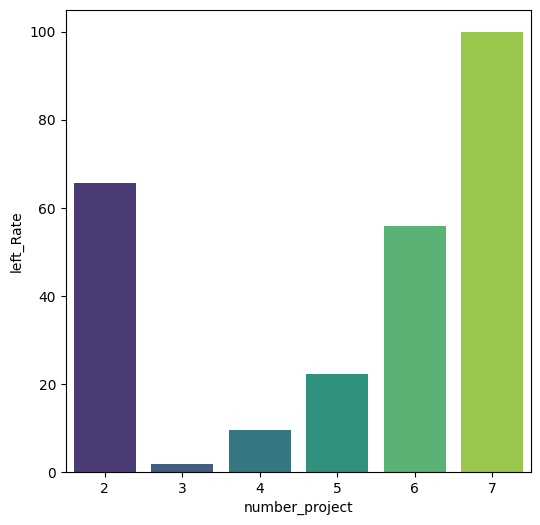

In [36]:
people_with_no_pro=df.groupby('number_project')
print(people_with_no_pro)
total_no_pro=people_with_no_pro.size()
print(total_no_pro)
left_people=people_with_no_pro['left'].sum()
print(left_people)
left_Ratio=(left_people/total_no_pro)*100
print(left_Ratio)
df3=pd.DataFrame({
    'Total_pro': total_no_pro, 
    'Employees_Left': left_people, 
    'left_Rate': left_Ratio
    }).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='number_project',y='left_Rate',data=df3,palette='viridis')

Total Number of People:

The largest group was involved in 2 projects (1567 people), and the smallest group in 3 projects (72 people).
Percentage of People Left:

The highest percentage of people leaving was for those involved in 7 projects (100.000000%), indicating all of them left. The lowest percentage of people leaving was for those involved in 3 projects (1.775586%).
This data suggests that while individuals involved in 3 or 4 projects have higher promotion rates and a greater number of promotions, the likelihood of people leaving increases significantly for those involved in 7 projects. This could indicate potential burnout or dissatisfaction among those with the highest project counts.


   number_project  promotion_last_5years
0               2                     37
1               3                     95
2               4                    117
3               5                     50
4               6                     20
5               7                      0


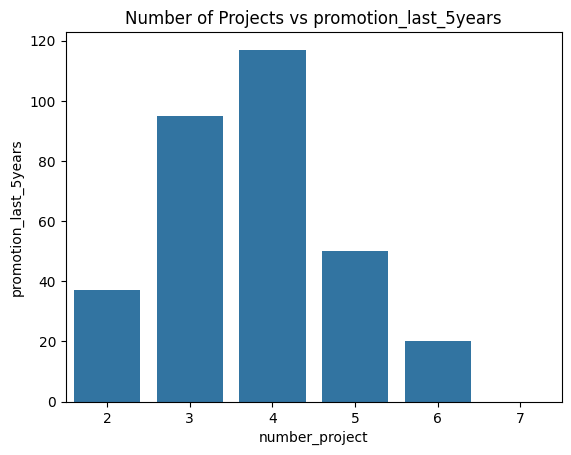

In [28]:
promotion=df.groupby('number_project')['promotion_last_5years'].sum().reset_index()
print(promotion)
plt.title('Number of Projects vs promotion_last_5years')
sns.barplot(x='number_project',y='promotion_last_5years',data=promotion)
plt.show()

number_project
2    2388
3    4055
4    4365
5    2761
6    1174
7     256
dtype: int64
number_project
2     37
3     95
4    117
5     50
6     20
7      0
Name: promotion_last_5years, dtype: int64
number_project
2    1.549414
3    2.342787
4    2.680412
5    1.810938
6    1.703578
7    0.000000
dtype: float64


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1201835854.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_project',y='promotion_Rate',data=df4,palette='viridis')


<Axes: xlabel='number_project', ylabel='promotion_Rate'>

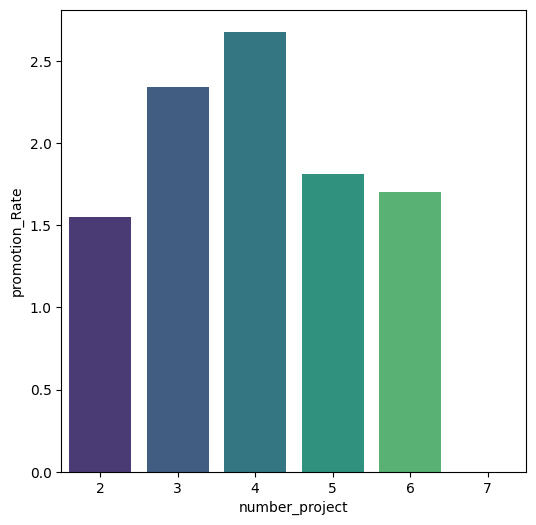

In [37]:
people_with_no_pro=df.groupby('number_project')
print(people_with_no_pro)
total_no_pro=people_with_no_pro.size()
print(total_no_pro)
left_people=people_with_no_pro['promotion_last_5years'].sum()
print(left_people)
left_Ratio=(left_people/total_no_pro)*100
print(left_Ratio)
df4=pd.DataFrame({
    'Total_pro': total_no_pro, 
    'Employees_Left': left_people, 
    'promotion_Rate': left_Ratio
    }).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='number_project',y='promotion_Rate',data=df4,palette='viridis')

Analysis
Promotion rates tend to fluctuate across different project counts, with the highest rate observed for those involved in 4 projects (2.680412) and the lowest (0.000000) for those involved in 7 projects.
The number of people promoted also varies, with the largest group (117 people) having been involved in 4 projects, while no promotions were recorded for those with 7 projects.
This data suggests that individuals involved in a moderate number of projects (particularly 3 or 4) have higher promotion rates and a greater number of promotions, whereas those involved in the maximum number of projects (7) did not receive any promotions.

# Attrition Analysis:

What are the key factors contributing to employee attrition?

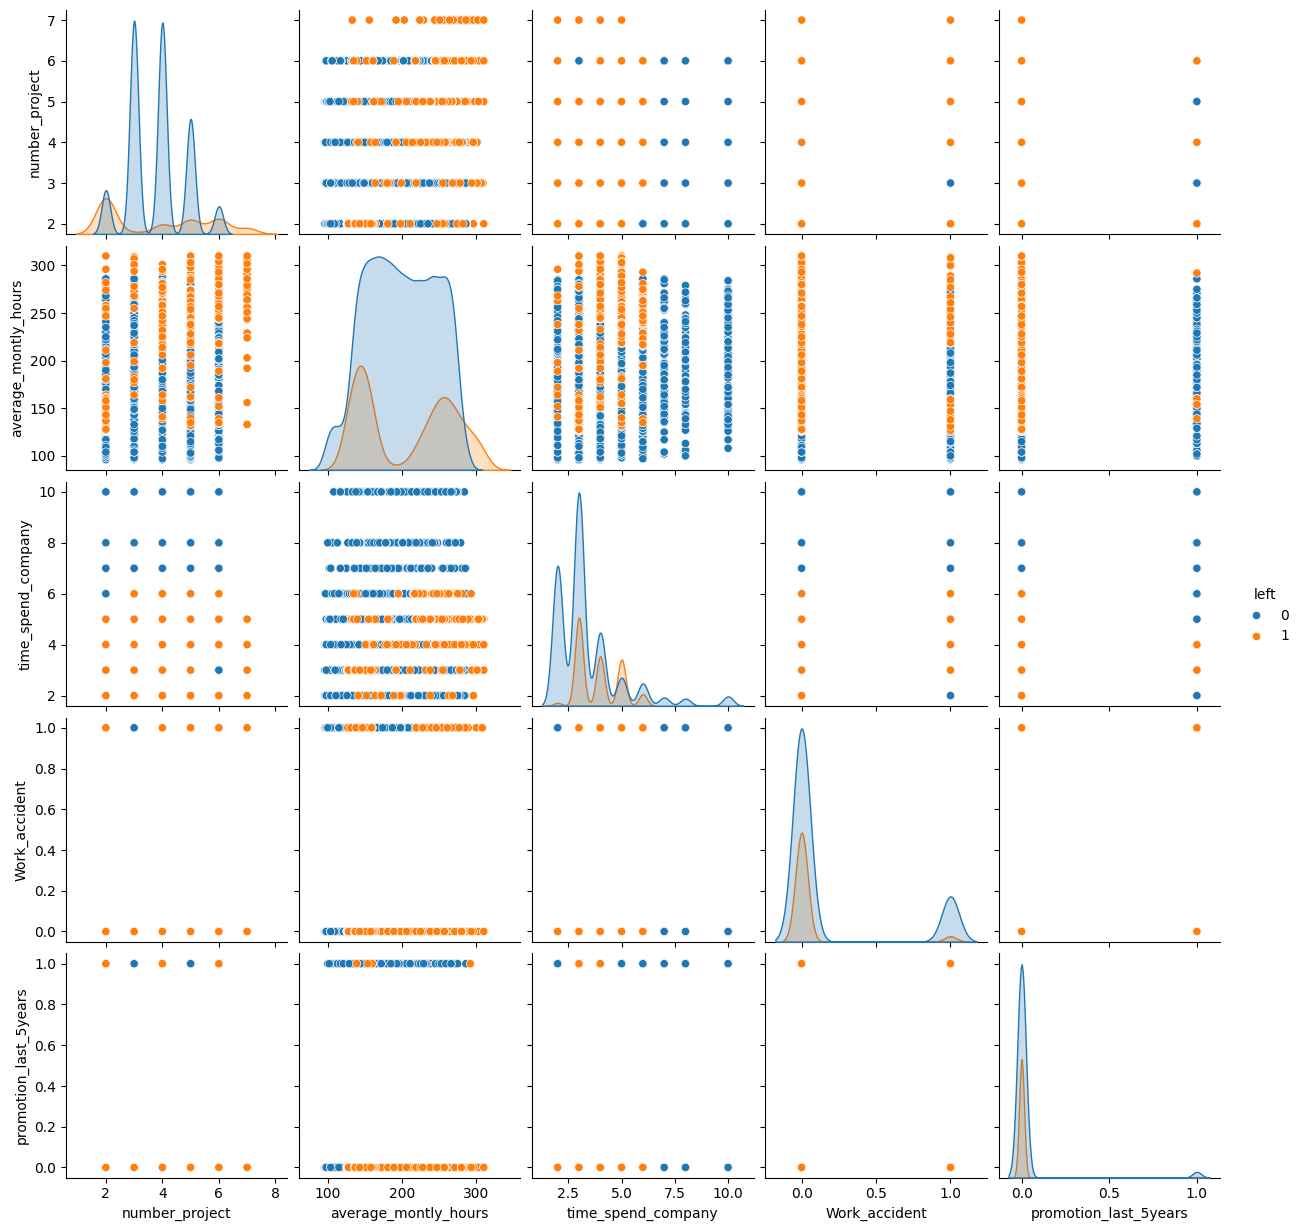

In [12]:
sns.pairplot(df, hue='left', vars=['number_project', 'average_montly_hours', 
                                   'time_spend_company', 'Work_accident', 'promotion_last_5years'])
plt.show()

2.Is there a significant difference in average monthly hours between employees who left and those who stayed?

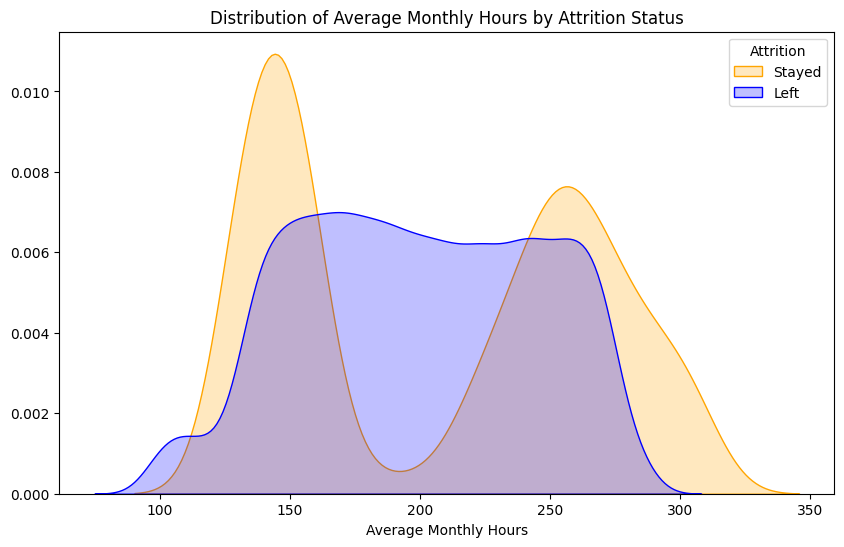

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='average_montly_hours', hue='left', fill=True, common_norm=False, palette={0: "blue", 1: "orange"})
plt.title('Distribution of Average Monthly Hours by Attrition Status')
plt.xlabel('Average Monthly Hours')
plt.ylabel('')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.show()

# Work Accidents:

How often do work accidents occur, and which departments are most affected?

Total number of accidents: 
2169
    department  Work_accident
0           IT            164
1        RandD            134
2   accounting             96
3           hr             89
4   management            103
5    marketing            138
6  product_mng            132
7        sales            587
8      support            345
9    technical            381


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1227435693.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department',y='Work_accident',data=Accidents,palette=colors)
C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1227435693.py:7: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='department',y='Work_accident',data=Accidents,palette=colors)


<Axes: xlabel='department', ylabel='Work_accident'>

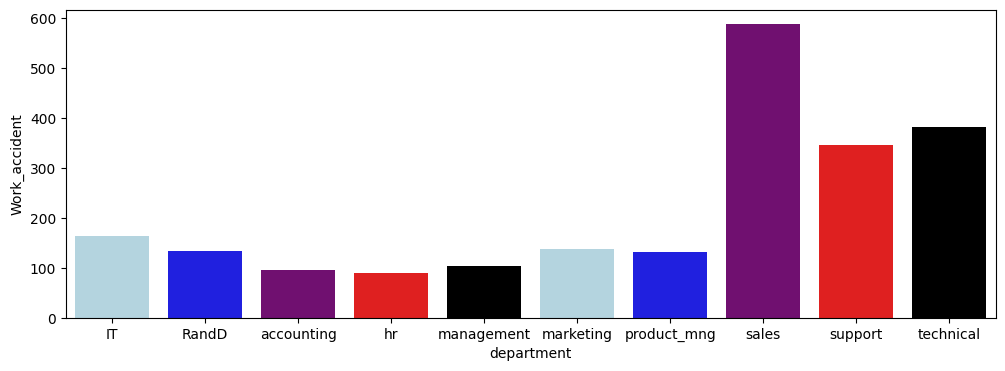

In [14]:
print('Total number of accidents: ')
print(df['Work_accident'].sum())
Accidents=df.groupby('department')['Work_accident'].sum().reset_index()
print(Accidents)
colors = ['lightblue', 'blue', 'purple', 'red', 'black']
plt.figure(figsize=(12,4))
sns.barplot(x='department',y='Work_accident',data=Accidents,palette=colors)

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64
department
IT             164
RandD          134
accounting      96
hr              89
management     103
marketing      138
product_mng    132
sales          587
support        345
technical      381
Name: Work_accident, dtype: int64
department
IT             13.365933
RandD          17.026684
accounting     12.516297
hr             12.043302
management     16.349206
marketing      16.083916
product_mng    14.634146
sales          14.178744
support        15.477793
technical      14.007353
dtype: float64


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\796080675.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department',y='Accident_Rate',data=rate_df,palette='viridis')


<Axes: xlabel='department', ylabel='Accident_Rate'>

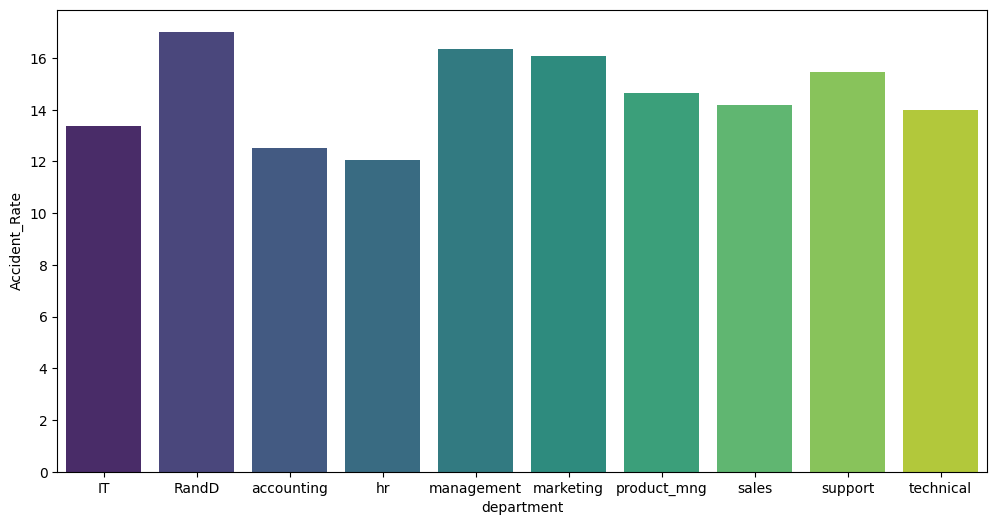

In [42]:
department_groups = df.groupby('department')
print(department_groups)
total_employees = department_groups.size()
print(total_employees)
employees_left = department_groups['Work_accident'].sum()
print(employees_left)
attrition_rate = (employees_left / total_employees) * 100
rate_df = pd.DataFrame({'Total_Employees': total_employees, 'Employees_Left': employees_left, 'Accident_Rate': attrition_rate}).reset_index()
print(attrition_rate)
plt.figure(figsize=(12,6))
sns.barplot(x='department',y='Accident_Rate',data=rate_df,palette='viridis')

Analysis:

Highest Percentage of Accidents:
R&D: 17.03%
Management: 16.35%
Marketing: 16.08%

Lowest Percentage of Accidents:
HR: 12.04%
Accounting: 12.52%
IT: 13.37%
Overall Trends:

Departments with the highest accident percentages (R&D, Management, and Marketing) may need more focus on safety protocols and preventive measures.
Departments with lower percentages (HR and Accounting) may already have effective safety measures in place but should continue monitoring to maintain or improve safety standards.
This data indicates that while some departments experience a higher percentage of accidents, overall safety measures should be evaluated and enhanced across all departments to ensure employee well-being.

2.Is there a correlation between the occurrence of work accidents and employee attrition?

   left  Work_accident
0     0          11428
1     1           3571


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1537838205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='left',y='Work_accident',data=Accidents,palette=colors)
C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1537838205.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='left',y='Work_accident',data=Accidents,palette=colors)


<Axes: xlabel='left', ylabel='Work_accident'>

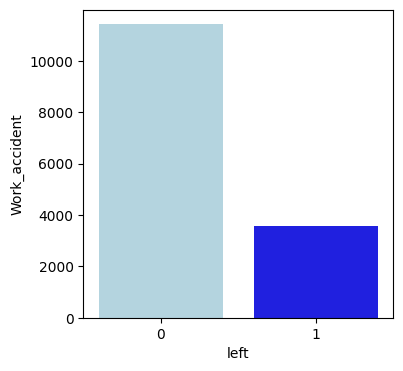

In [44]:
Accidents=df.groupby('left')['Work_accident'].count().reset_index()
print(Accidents)
colors = ['lightblue', 'blue', 'purple', 'red', 'black']
plt.figure(figsize=(4,4))
sns.barplot(x='left',y='Work_accident',data=Accidents,palette=colors)

# Promotions:

1. What percentage of employees have been promoted in the last 5 years?

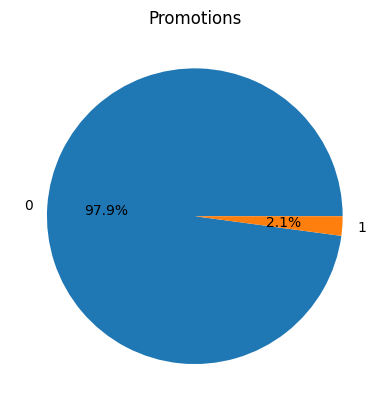

In [16]:
df['promotion_last_5years'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Promotions')
plt.ylabel('')
plt.show()

How does promotion frequency vary across different departments and salary levels

Total number of Promotions : 
319
    department  promotion_last_5years
0           IT                      3
1        RandD                     27
2   accounting                     14
3           hr                     15
4   management                     69
5    marketing                     43
6  product_mng                      0
7        sales                    100
8      support                     20
9    technical                     28


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\3685037144.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department',y='promotion_last_5years',data=Dep_promo,palette=colors)
C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\3685037144.py:6: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='department',y='promotion_last_5years',data=Dep_promo,palette=colors)


<Axes: xlabel='department', ylabel='promotion_last_5years'>

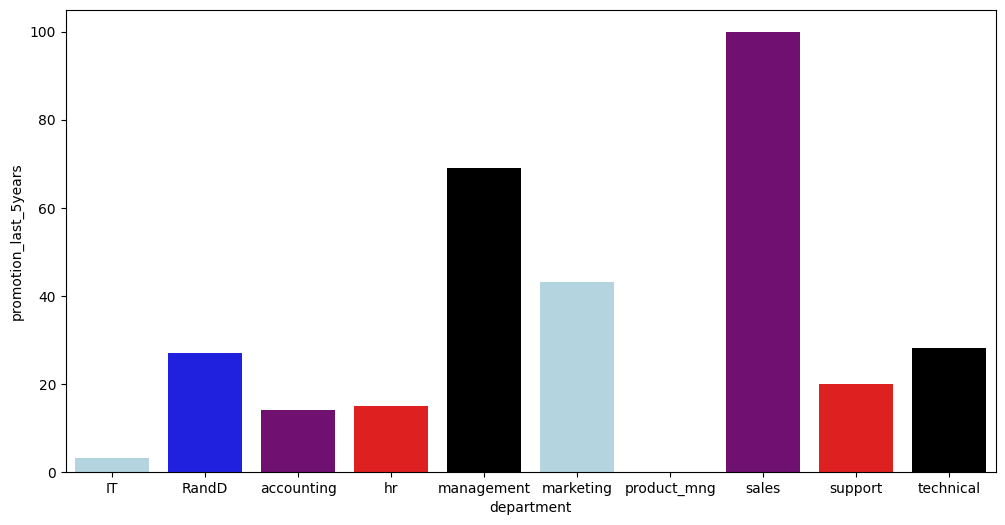

In [17]:
print('Total number of Promotions : ')
print(df['promotion_last_5years'].sum())
Dep_promo=df.groupby('department')['promotion_last_5years'].sum().reset_index()
print(Dep_promo)
plt.figure(figsize=(12,6))
sns.barplot(x='department',y='promotion_last_5years',data=Dep_promo,palette=colors)

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64
department
IT               3
RandD           27
accounting      14
hr              15
management      69
marketing       43
product_mng      0
sales          100
support         20
technical       28
Name: promotion_last_5years, dtype: int64
department
IT              0.244499
RandD           3.430750
accounting      1.825293
hr              2.029770
management     10.952381
marketing       5.011655
product_mng     0.000000
sales           2.415459
support         0.897263
technical       1.029412
dtype: float64


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\822798302.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department',y='promotion_Rate',data=df2,palette='viridis')


<Axes: xlabel='department', ylabel='promotion_Rate'>

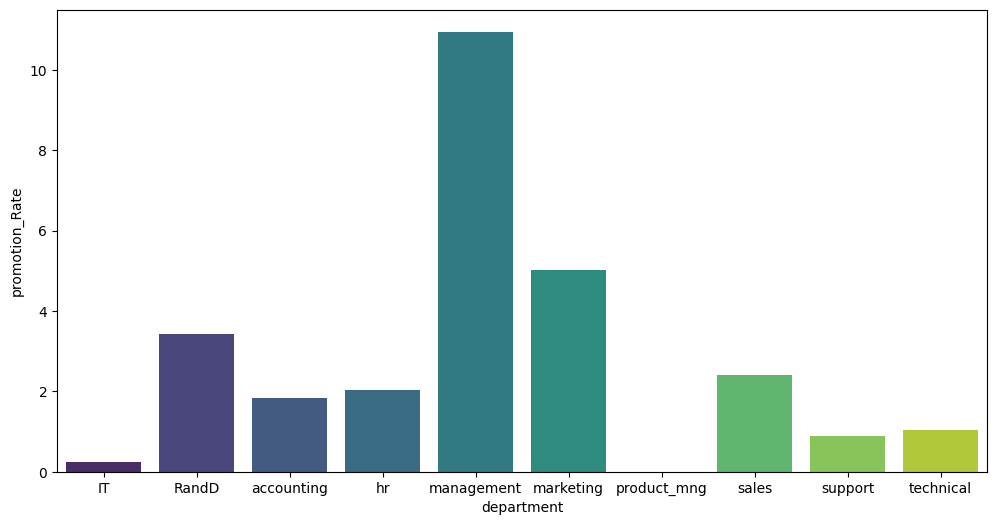

In [47]:
employs=df.groupby('department')
total_salary=employs.size()
print(total_salary)
left_employ=employs['promotion_last_5years'].sum()
print(left_employ)
artition_rate=(left_employ/total_salary)*100
print(artition_rate)
df2=pd.DataFrame({
    'Total_Employees': total_salary, 
    'Employees_Left': left_employ, 
    'promotion_Rate': artition_rate
}).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='department',y='promotion_Rate',data=df2,palette='viridis')

Analysis:
Highest Promotion Rates:

Management: 10.95%
Marketing: 5.01%
R&D: 3.43%
Lowest Promotion Rates:

Product Management: 0.00%
IT: 0.24%
Support: 0.90%
Overall Trends:

The Management department has the highest promotion rate, indicating strong career advancement opportunities within this area.
The Product Management department has no recorded promotions, suggesting potential issues with career progression that may need addressing.
Departments with lower promotion rates like IT and Support may need to evaluate their promotion policies and identify potential barriers to advancement.
This data indicates a disparity in promotion rates across departments, with some showing robust advancement opportunities while others may require strategic interventions to enhance career growth and employee satisfaction.

Total number of Promotions :
   salary  promotion_last_5years
0    high                     72
1     low                     66
2  medium                    181


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1835625857.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary',y='promotion_last_5years',data=Dep_promo,palette=colors)
C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\1835625857.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x='salary',y='promotion_last_5years',data=Dep_promo,palette=colors)


<Axes: xlabel='salary', ylabel='promotion_last_5years'>

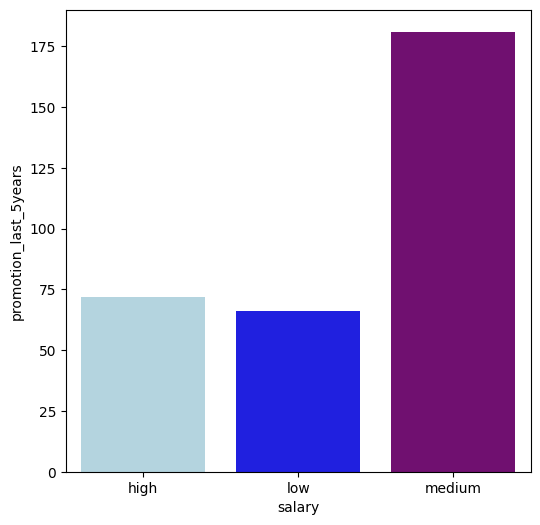

In [18]:
print('Total number of Promotions :')
Dep_promo=df.groupby('salary')['promotion_last_5years'].sum().reset_index()
print(Dep_promo)
plt.figure(figsize=(6,6))
sns.barplot(x='salary',y='promotion_last_5years',data=Dep_promo,palette=colors)

# Department-wise Analysis:

Which departments have the highest and lowest employee attrition rates?

In [19]:
department_groups = df.groupby('department')
print(department_groups)
total_employees = department_groups.size()
employees_left = department_groups['left'].sum()
attrition_rate = (employees_left / total_employees) * 100
attrition_rate_df = pd.DataFrame({'Total_Employees': total_employees, 'Employees_Left': employees_left, 'Attrition_Rate': attrition_rate}).reset_index()
highest_attrition_department = attrition_rate_df.loc[attrition_rate_df['Attrition_Rate'].idxmax()]
lowest_attrition_department = attrition_rate_df.loc[attrition_rate_df['Attrition_Rate'].idxmin()]
print("Department with the Highest Attrition Rate:")
print(highest_attrition_department)
print("\nDepartment with the Lowest Attrition Rate:")
print(lowest_attrition_department)

Department with the Highest Attrition Rate:
department                hr
Total_Employees          739
Employees_Left           215
Attrition_Rate     29.093369
Name: 3, dtype: object

Department with the Lowest Attrition Rate:
department         management
Total_Employees           630
Employees_Left             91
Attrition_Rate      14.444444
Name: 4, dtype: object


Attrition Rates:
Department with the Highest Attrition Rate:

Department: Human Resources (HR)
Total Employees: 739
Employees Left: 215
Attrition Rate: 29.09%
Department with the Lowest Attrition Rate:

Department: Management
Total Employees: 630
Employees Left: 91
Attrition Rate: 14.44%

2.How does the time spent at the company vary across departments

52470
    department  time_spend_company
0           IT                4256
1        RandD                2650
2   accounting                2702
3           hr                2480
4   management                2711
5    marketing                3063
6  product_mng                3135
7        sales               14631
8      support                7563
9    technical                9279


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\4175409522.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department',y='time_spend_company',data=depart_time_spent,palette='viridis')


<Axes: xlabel='department', ylabel='time_spend_company'>

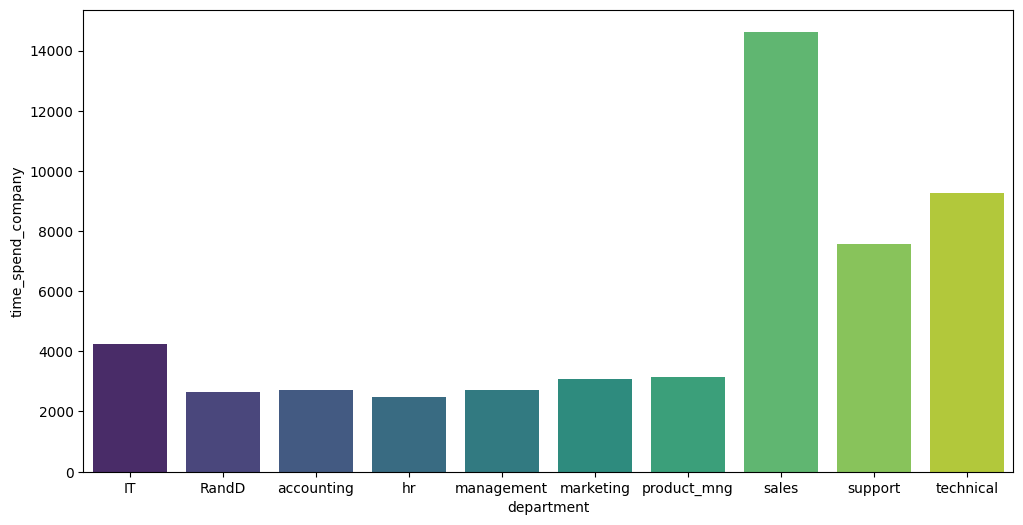

In [20]:
print(df['time_spend_company'].sum())
depart_time_spent=df.groupby('department')['time_spend_company'].sum().reset_index()
print(depart_time_spent)
plt.figure(figsize=(12,6))
sns.barplot(x='department',y='time_spend_company',data=depart_time_spent,palette='viridis')

# Salary Analysis:

What is the distribution of salary levels across different departments?

    department  salary
0           IT    1227
1        RandD     787
2   accounting     767
3           hr     739
4   management     630
5    marketing     858
6  product_mng     902
7        sales    4140
8      support    2229
9    technical    2720


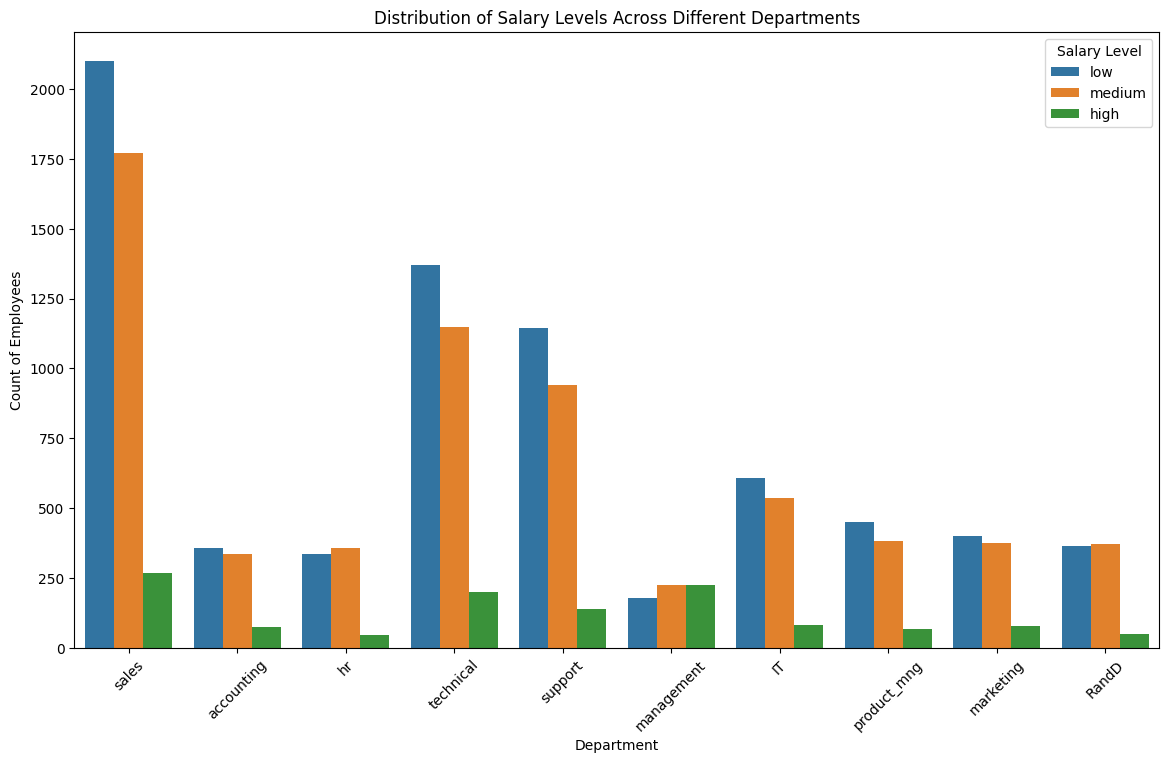

In [53]:
sns.countplot(data=df, x='department', hue='salary')
plt.title('Distribution of Salary Levels Across Different Departments')
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.xticks(rotation=45)
plt.legend(title='Salary Level')
plt.show()

How does salary level influence employee attrition?

salary
high      1237
low       7316
medium    6446
dtype: int64
salary
high        82
low       2172
medium    1317
Name: left, dtype: int64
salary
high       6.628941
low       29.688354
medium    20.431275
dtype: float64


C:\Users\aa946\AppData\Local\Temp\ipykernel_4908\2376192268.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary',y='Attrition_Rate',data=df2,palette='viridis')


<Axes: xlabel='salary', ylabel='Attrition_Rate'>

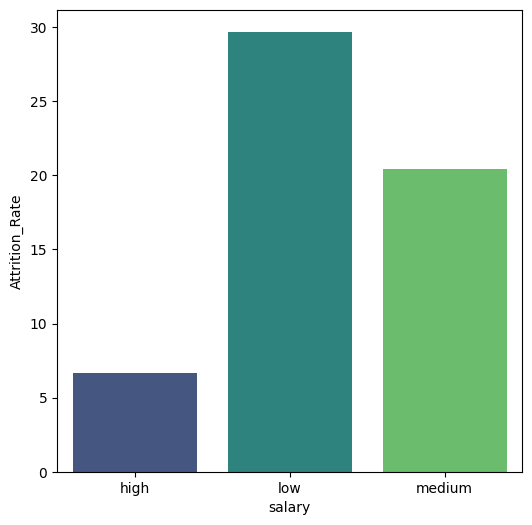

In [22]:
employs=df.groupby('salary')
total_salary=employs.size()
print(total_salary)
left_employ=employs['left'].sum()
print(left_employ)
artition_rate=(left_employ/total_salary)*100
print(artition_rate)
df2=pd.DataFrame({
    'Total_Employees': total_salary, 
    'Employees_Left': left_employ, 
    'Attrition_Rate': artition_rate
}).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='salary',y='Attrition_Rate',data=df2,palette='viridis')

# Overall Insights:

Provide a comprehensive overview of employee engagement and performance metrics.

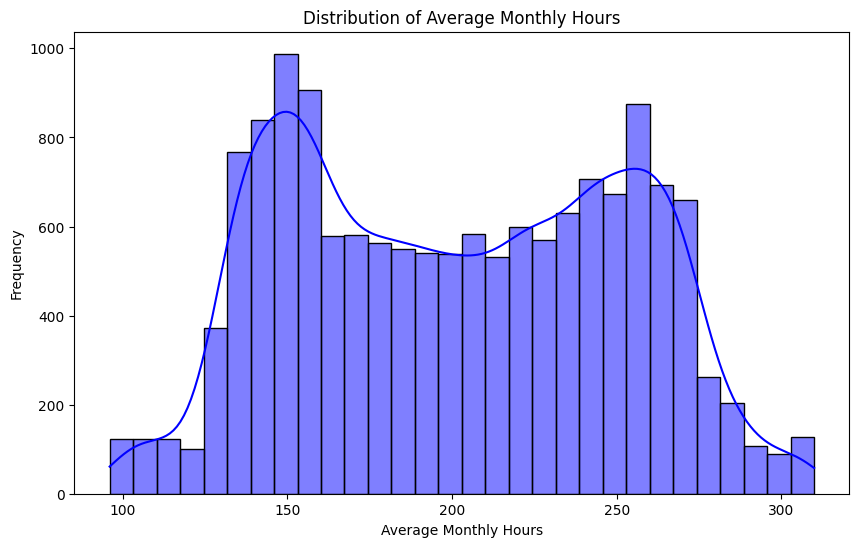

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['average_montly_hours'], kde=True, color='blue')
plt.title('Distribution of Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.show()


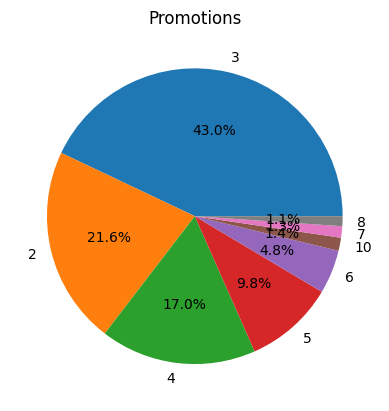

In [24]:
df['time_spend_company'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Promotions')
plt.ylabel('')
plt.show()